In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
z=t**2+2
f=-z**2 + z + 2*z*t**2 + 2*t - t**2 -t**4
m=y(t)*(y(t)-1)*(y(t)-3)
print m.expand()

y(t)**3 - 4*y(t)**2 + 3*y(t)


In [96]:
C1=Symbol('C1')
t=Symbol('t')
y = Function('y')
O = Function('O')
fff = diff(y(t), t)-pow(y(t),1.0/3)*sin(2*t)
sol=dsolve(fff,y(t))
print sol
f=Lambda((t),sol[0].rhs.removeO())

c1=solve(f(0),C1)[0].evalf()
print re(c1)
s=sol[0].subs(C1,re(c1))
print s,'\n\n\n\n',c1
ff=Lambda(t,s.rhs.removeO())

[y(t) == -0.192450089729875*sqrt(8.0*C1**3 - 12.0*C1**2*cos(2.0*t) + 6.0*C1*cos(2.0*t)**2 - cos(2.0*t)**3), y(t) == 0.192450089729875*sqrt(8.0*C1**3 - 12.0*C1**2*cos(2.0*t) + 6.0*C1*cos(2.0*t)**2 - cos(2.0*t)**3)]
0.500000000000000
y(t) == -0.192450089729875*sqrt(-cos(2.0*t)**3 + 3.0*cos(2.0*t)**2 - 3.0*cos(2.0*t) + 1.0) 



0.500000000000000


(-10, 10)

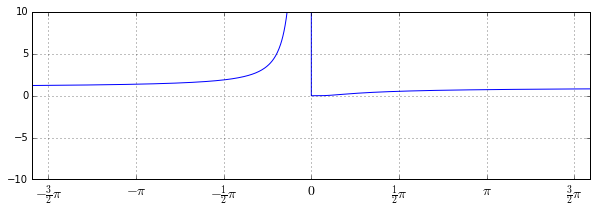

In [85]:
from customticks import create_pi_labels
ax  = plt.figure(figsize=(10,3)).add_subplot(111)
pos,label =create_pi_labels(-2,2,.5)
ax.set_xticks(pos)
#ax.set_yticks(np.linspace (1,-2, int(3/.2 )+1))
ax.set_xticklabels(label, fontsize=14)
ttt=np.linspace(-5,5,int(10/.01)+1)
yyy=[re(ff(i).evalf())  for i in ttt]
plt.plot(ttt,yyy);
plt.grid()
#plt.ylim([-10,10])

In [51]:
from findNearstValue import find_nearest
i,c=find_nearest(np.array(yyy),-2)
ttt[i]

-9.0

(-5, 5)

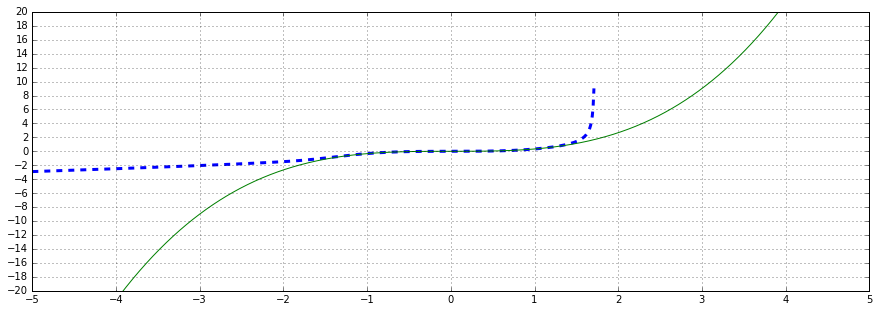

In [153]:
#euler method
def f(y,t):
    return y**3+t**2
def fe(y0,t0,dt,it):
    y=[y0]
    t=[t0]
    m=[f(y0,t0)]
    for i in range(1,it): 
        ti=t[i-1]+dt
        yi=y[i-1]+m[i-1]*dt
        mi=f(yi,ti)
        if abs(mi)>3000:
            break
        t.append(ti)
        y.append(yi)
        m.append(mi)
    return t,y
#for y0,t0 in [[1,0]]:
y0=0
t0=0
interv=5
from customticks import create_pi_labels
ax  = plt.figure(figsize=(15,5)).add_subplot(111)
pos,label =create_pi_labels(-2,2,.5)
#ax.set_xticks(pos)
ax.set_yticks(np.linspace (-20,20, int(40/2 )+1))
ax.set_xticks(np.linspace (-5,5, int(10/1 )+1))
#ax.set_xticklabels(label, fontsize=14)
for dt in [.01]:
    
    tt1,yy1=fe(y0,t0,dt,int(interv/dt)+1)
    #print yy1
    #plt.plot(tt1,yy1)
    #print "for dt =",dt, yy1.index(vtg),t[yy1.index(vtg)]
    tt2,yy2=fe(y0,t0,-dt,int(interv/dt)+1) 
    tt2.reverse()
    yy2.reverse()
    t=tt2[:-1]+tt1
    y=yy2[:-1]+yy1
    l=plt.plot(t,y);
plt.setp(l,'linestyle','--')      
plt.setp(l,'linewidth',3)    
plt.plot(ttt,yyy);
plt.grid()

plt.ylim([-20,20])
plt.xlim([-5,5])

In [164]:
y=Symbol('y')
t=Symbol('t')
diff(pow(y,1./3.)*sin(2*t),y)

0.333333333333333*y**(-0.666666666666667)*sin(2*t)

In [148]:
import findNearstValue